In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the csv file with the data
df=pd.read_csv("./diabetes.csv")

In [3]:
#Creat x and y, drop the outcome and pregnancies columns from x
to_drop=np.array(["Outcome","Pregnancies"])
x = df.drop(to_drop,axis=1)
y = np.array(df["Outcome"])
x = pd.DataFrame(x)

#create the training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [4]:
#compute mean of each column in x_train
x_train_means = x_train[0:].mean()

#assign the mean of each column to a variable for the default values in the GUI test boxes
glucose_mean=x_train_means["Glucose"]
bp_mean=x_train_means["BloodPressure"]
skin_mean=x_train_means["SkinThickness"]
insulin_mean=x_train_means["Insulin"]
bmi_mean=x_train_means["BMI"]
dpf_mean=x_train_means["DiabetesPedigreeFunction"]
age_mean=x_train_means["Age"]

In [5]:
#replace null values in the remaining x rows with the mean of the column
col1=["Glucose"]
col2=["BloodPressure"]
col3=["SkinThickness"]
col4=["BMI"]
col5=["Age"]
col6=["DiabetesPedigreeFunction"]
col7=["Insulin"]

inputer = SimpleImputer(missing_values=0,strategy="mean")

transform=ColumnTransformer([("Glucose",inputer,col1),
                            ("BloodPressure",inputer,col2),
                            ("SkinThickness",inputer,col3),
                            ("BMI",inputer,col4),
                            ("Age",inputer,col5),
                             ("DiabetesPedigreeFunction",inputer,col6),
                             ("Insulin",inputer,col7)
                            ])


x_train = transform.fit_transform(x_train)
x_test = transform.transform(x_test)
x = transform.transform(x)

In [6]:
#create the random forest classifier model
model = RandomForestClassifier(n_jobs=-1)

In [7]:
#train the random forest classifier
model.fit(x_train,y_train);

In [8]:
from sklearn.model_selection import cross_val_score
#for testing purposes
#cvs= cross_val_score(model,x,y,cv=5).mean()

In [9]:
#import ipywidgets for gui
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from ipywidgets import TwoByTwoLayout

## Diabetes Prediction System

DPF stands for Diabetes Pedigree Function, if it is on record. For any unknown metrics, leave the default value in the text box.

In [10]:
#create boxes of entering of patient data

In [11]:
insul=widgets.BoundedFloatText(
    value=insulin_mean.round(2),
    min=0,
    max=200,
    step=0.1,
    description='Insulin:',
    disabled=False)

In [12]:
age=widgets.BoundedFloatText(
    value=age_mean.round(2),
    min=0,
    max=200,
    step=0.1,
    description='Age:',
    disabled=False)


In [13]:
gluc=widgets.BoundedIntText(
    value=glucose_mean.round(2),
    min=0,
    max=300,
    step=1,
    description='Glucose:',
    disabled=False
)


In [14]:
bp=widgets.BoundedIntText(
    value=bp_mean.round(2),
    min=0,
    max=200,
    step=1,
    description='BP:',
    disabled=False
)


In [15]:
skin=widgets.BoundedIntText(
    value=skin_mean.round(),
    min=0,
    max=100,
    step=1,
    description='Skin Thickness:',
    disabled=False
)


In [16]:
insulin=widgets.BoundedIntText(
    value=insulin_mean.round(),
    min=0,
    max=100,
    step=1,
    description='Insulin:',
    disabled=False
)


In [17]:
bmi=widgets.BoundedFloatText(
    value=bmi_mean.round(),
    min=0,
    max=100,
    step=1,
    description='BMI:',
    disabled=False
)


In [18]:
dpf=widgets.BoundedFloatText(
    value=dpf_mean.round(),
    min=0,
    max=100,
    step=1,
    description='DPF:',
    disabled=False
)


In [19]:
#layout of boxes
layout_2x2 = TwoByTwoLayout(top_left=age,
                            bottom_left=dpf,
                            top_right=gluc,
                           bottom_right=skin)

display(layout_2x2)
layout_2x2_2 = TwoByTwoLayout(top_left=bmi,
                            top_right=bp,
                              bottom_left=insul
                            )
display(layout_2x2_2)


TwoByTwoLayout(children=(BoundedFloatText(value=33.41, description='Age:', layout=Layout(grid_area='top-left')…

TwoByTwoLayout(children=(BoundedFloatText(value=32.0, description='BMI:', layout=Layout(grid_area='top-left'),…

In [20]:
#get values of boxes and save to a variable
patient_age=age.value
patient_gluc=gluc.value
patient_bp=bp.value
patient_skin=skin.value
patient_insul=insul.value
patient_bmi=bmi.value
patient_dpf=dpf.value

Probability of Diabetes:

In [21]:
#create output box
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border='1px solid black'))

In [22]:
#create enter button
from IPython.display import display

button = widgets.Button(description="Enter")

output = widgets.Output()

display(button, output)

#when button is pressed save the values entered into the boxes into variables
def on_button_clicked(b):
    patient_age=age.value
    patient_gluc=gluc.value
    patient_bp=bp.value
    patient_skin=skin.value
    patient_insul=insul.value
    patient_bmi=bmi.value
    patient_dpf=dpf.value

    #create an array of the metrics entered
    patient_metrics = np.array([patient_gluc,patient_bp,patient_skin,patient_bmi,patient_age,patient_dpf,patient_insul])

    #reshape array for entering into the prediction model
    patient_metrics=patient_metrics.reshape(1,7)
    prediction_proba=model.predict_proba(patient_metrics)
    prediction=model.predict(patient_metrics)
    
    #output according to results of model prediction
    if prediction==0:
        with out:
            print("Patient is unlikely to have diabetes.")
            print("Patient is " + str(prediction_proba[0,0]*100) +
                                "% likely to not have diabetes, and only " + str(prediction_proba[0,1]*100) +"% likely to have diabetes.")
       
    if prediction==1:
        with out:
            print("Patient is likely to have diabetes.")
            print("Patient is only " + str(prediction_proba[0,0]*100) +
                                "% likely to not have diabetes, and " + str(prediction_proba[0,1]*100) +"% likely to have diabetes.")

button.on_click(on_button_clicked)




Button(description='Enter', style=ButtonStyle())

Output()

In [23]:
#get feautre importance and convert to a percentage
importances = model.feature_importances_
for i in range(0,len(importances),1):
    product = importances[i]*100
    importances[i]=product.round(1)

#convert feature importances into a dataframe
importances_df=pd.DataFrame(importances,index=['Glucose', 'Blood Pressure', 'Skin Thickness', 'BMI', 'Age','Diabetes Pedigree Function', 'Insulin'])

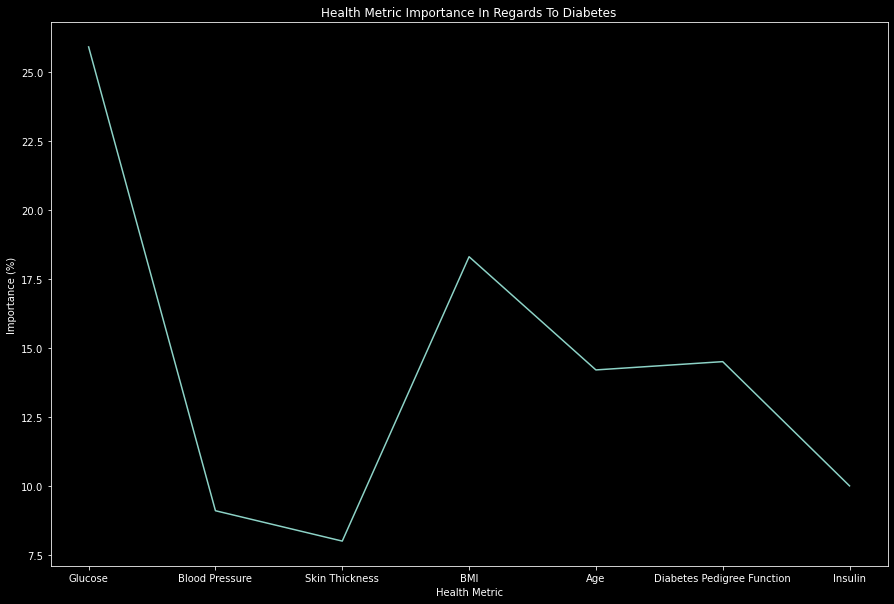

In [24]:
#create a metrics array for the table creation
metrics=['Glucose', 'Blood Pressure', 'Skin Thickness', 'BMI', 'Age','Diabetes Pedigree Function', 'Insulin']

#create a line chart using the metrics and the feature importances 
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15,10))
ax.set(title="Health Metric Importance In Regards To Diabetes", xlabel="Health Metric", ylabel="Importance (%)")
ax.plot(metrics,importances);

In [25]:
#create a dataframe from the x test values
x_df=pd.DataFrame(x_test,columns=(["Glucose","Blood Pressure","Skin Thickness","BMI","Age","Diabetes Pedigree Function","Insulin"]))

#create a dataframe from the y test values
y_df=pd.DataFrame(y_test,columns=(["Diabetic"]))

#join x and y test values into one dataframe
x_df=x_df.join(y_df)


In [26]:
#create two different dataframes for the x/y test data, one for diagnosed diabetics and one for undiagnosed patients
diabetic=pd.DataFrame(columns=(['Glucose', 'Blood Pressure', 'Skin Thickness', 'BMI', 'Age','Diabetes Pedigree Function', 'Insulin','Diabetic']))
not_diabetic=pd.DataFrame(columns=(['Glucose', 'Blood Pressure', 'Skin Thickness', 'BMI', 'Age','Diabetes Pedigree Function', 'Insulin','Diabetic']))
for i in range(0,len(x_df),1):
    current=x_df.iloc[i,7]
    if current==1:
        to_append=x_df.iloc[i]
        to_append=to_append.transpose()
        diabetic=diabetic.append(to_append)
    if current==0:
        to_append=x_df.iloc[i]
        to_append=to_append.transpose()
        not_diabetic=not_diabetic.append(to_append)

In [27]:
#drop the diagnosis column
diabetic=diabetic.drop("Diabetic",axis=1)
not_diabetic=not_diabetic.drop("Diabetic",axis=1)

#create an array of the column means from each of the dataframes
diabetic_means=np.array(diabetic[0:].mean())
not_diabetic_means=np.array(not_diabetic[0:].mean())

#reshape the arrays
diabetic_means = diabetic_means.reshape(1,7)
not_diabetic_means = not_diabetic_means.reshape(1,7)

In [28]:
#will hold the data for the 2nd figure
fig2_data=[]

#combine the means arrays, alternating each health metric mean between diagnosed/not diagnosed
for i in range(0,2,1):
    fig2_data=np.append(fig2_data,diabetic_means[0,i])
    fig2_data=np.append(fig2_data,not_diabetic_means[0,i])
for i in range(3,5,1):
    fig2_data=np.append(fig2_data,diabetic_means[0,i])
    fig2_data=np.append(fig2_data,not_diabetic_means[0,i])
for i in range(6,7,1):
    fig2_data=np.append(fig2_data,diabetic_means[0,i])
    fig2_data=np.append(fig2_data,not_diabetic_means[0,i])
    
#reshape the fig2_data
fig2_data=fig2_data.reshape(1,10)

#create the labels for the figure
labels = ["Diag Glucose","Undiag Glucose","Diag BP","Undiag BP","Diag Insulin","Undiag Insulin","Diag BMI","Undiag BMI","Diag Age","Undiag Age"]

#convert fig2_data into a dataframe using the labels
fig2_data_df=pd.DataFrame(fig2_data,columns=labels)

#swap axis of fig2_data
fig2=fig2_data_df.transpose()

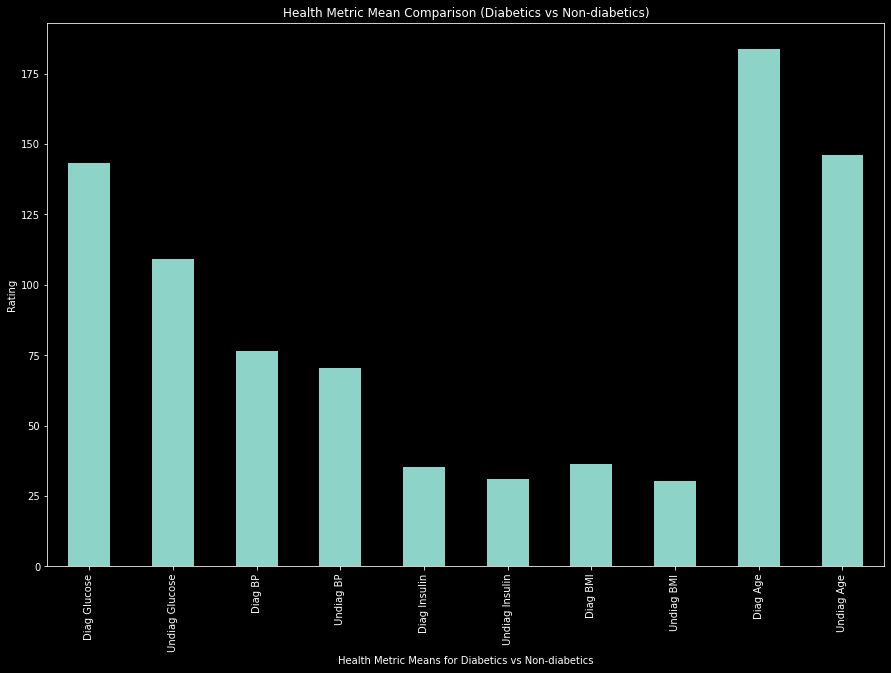

In [29]:
#create 2nd figure
plt.style.use('dark_background')

ax=fig2.plot(kind='bar',figsize=(15,10))
ax.set(title="Health Metric Mean Comparison (Diabetics vs Non-diabetics)", xlabel="Health Metric Means for Diabetics vs Non-diabetics", ylabel="Rating")
ax.get_legend().remove()

In [30]:
y_df=pd.DataFrame(y_train,columns=(["Diabetic"]))
x_df=pd.DataFrame(x_train,columns=(["Glucose","Blood Pressure","Skin Thickness","BMI","Age","Diabetes Pedigree Function","Insulin"]))
x_df=x_df.join(y_df)

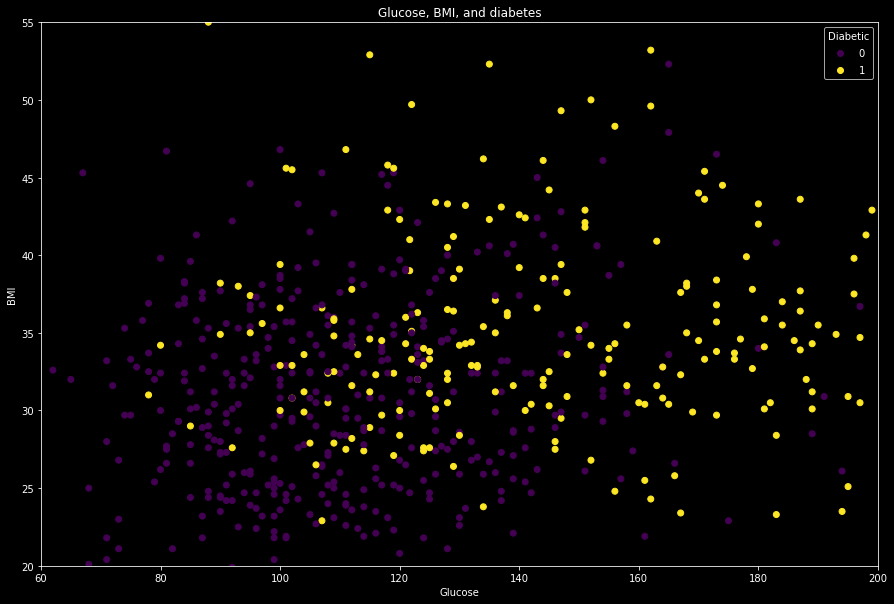

In [31]:
#create the 3rd figure, a scatterplot comparing age, bmi, and diabetes occurence
fig, ax=plt.subplots(figsize=(15,10))

scatter=ax.scatter(x=x_df["Glucose"],
                  y=x_df["BMI"],
                  c=x_df["Diabetic"]);
ax.legend(*scatter.legend_elements(),title = "Diabetic");

ax.set(title="Glucose, BMI, and diabetes")
ax.set(xlabel="Glucose")
ax.set(ylabel="BMI");

#trim plot by setting limits
plt.xlim(60,200);
plt.ylim(20,55);